In [1]:
import numpy as np
import os
import pandas as pd
import neurokit2 as nk
from scipy.signal import find_peaks
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
destination_folder = r"C:\Users\leagi\Documents\EI22\Projet Ecole\data\Préprocessing"
root_folder = r"C:\Users\leagi\Documents\EI22\Projet Ecole\data\ecg_dataset.csv"

In [26]:
# fonction qui lit le fichier csv contennant toutes les résultats des expériences ecg
def read_dataset_csv(root_folder):
    dataset_df = pd.read_csv(root_folder, sep="\t")
    return dataset_df
dataset_df = read_dataset_csv(root_folder)

In [27]:
#fonction qui créer la base de temps permettant de tracer les graphs
def creation_base_time(data):
    list_time = pd.date_range("20240403", periods = len(data), freq = "0.01S")
    time=[]
    for date in list_time:
        time_str = date.strftime("%M:%S.%f")
        time.append(time_str[:-4])
    return time  

In [32]:
#fonction qui filtre le signal de 1 seule expérience
def preprocessing_one_ecg_signal(ID, Task, data, destination_folder):
    #creation base de temps car pas le même nombre de point pour chaque expérience
    time = creation_base_time(data)

    #Filtrage
    signal_filtered = nk.signal_filter(data["ECG"].values, 250, highcut=0.5, method = "butterworth", order=5)
    #dataframe avec le temps les données filtrées et non filtrées
    ecg_df = pd.DataFrame({"Time" : time, "Signal non filtré" : data["ECG"], "Signal filtré" : signal_filtered})
    
    #tracé de des courbes avant et après filtrage
    #ecg_df.plot(x="Time", y=["Signal non filtré", "Signal filtré"], title="Comparaison signaux ecg")
    #plt.xlabel("Time(min)")
    #plt.ylabel("Amplitude")

    #Enregistrement du dataframe en fichier csv 
    filename = ID + '_' + Task + '_ecg_data_filtered.csv'
    completeDestination = destination_folder + "\\"+ ID
    if not os.path.exists(completeDestination):
        os.makedirs(completeDestination)
    ecg_df.to_csv(os.path.join(completeDestination, filename), sep=';', index=False)
    return

In [30]:
#pour tester le filtrage sur un fichier de notre choix
#data=pd.read_csv(r'C:\Users\leagi\Documents\EI22\Projet Ecole\data\Physiological\2ea4\2ea4_Baseline_ecg_data.csv')
#preprocessing_one_ecg_signal('2ea4', 'Baseline', data, destination_folder)

In [31]:
def preprocessing_ecg_datas(root_folder, destination_folder):
    #ouverture de la base de donnée
    dataset_df = read_dataset_csv(root_folder)
    
    #traitement de tous les signaux 
    groups=dataset_df.groupby(['ID','Task'])
    for (iden, task), group in groups:
        group_data = groups.get_group((iden, task))
        #print(group_data)
        preprocessing_one_ecg_signal(iden, task, group_data, destination_folder)
    return 

In [25]:
#commande à éxécuter pour filtrer tous les signaux ecg pour chaque personne et expérience
preprocessing_ecg_datas(root_folder, destination_folder)

#############PARTIE TEST PAS TRES UTILE###############

In [231]:
data=pd.read_csv(r'C:\Users\leagi\Documents\EI22\Projet Ecole\data\Physiological\2ea4\2ea4_Baseline_ecg_data.csv')
len(data)

30000

In [195]:
list_time = pd.date_range("20240403", periods = len(data), freq = "0.01S")
#list_time

In [235]:
###### time= []
for date in list_time:
    time_str = date.strftime("%M:%S.%f")
    time.append(time_str[:-4])
time[-1]

'04:59.99'

In [197]:
ecg_signal = pd.DataFrame({"Time" : time, "Amplitude": data["ECG"]})
ecg_signal["Amplitude"]

In [198]:
signal_filtered = nk.signal_filter(ecg_signal["Amplitude"].values, 250, highcut=0.5, method = "butterworth", order=5)
#signal_filtered

In [199]:
ecg_filtered = pd.DataFrame({"Time" : time, "Amplitude" : signal_filtered})
#ecg_filtered

In [200]:
ecg = pd.DataFrame({"Time" : time, "Signal non filtré" : ecg_signal["Amplitude"], "Signal filtré" : ecg_filtered["Amplitude"]})
#ecg

Text(0, 0.5, 'Amplitude')

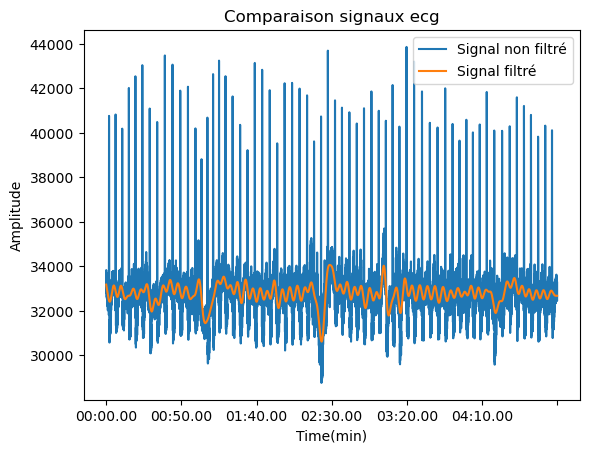

In [201]:
ecg.plot(x="Time", y=["Signal non filtré", "Signal filtré"], title="Comparaison signaux ecg")
plt.xlabel("Time(min)")
plt.ylabel("Amplitude")